# Fake News Detection and Probability Score Task

 **Mounting drive to access the Dataset**

 path = /content/drive/MyDrive/Colab Notebooks/fakeNewsPrediction/cleanbn_fakenews.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fakeNewsPrediction/cleanbn_fakenews.csv')
print(dataset.head())
print(dataset.shape)


   label                                               text
0      0  ঢাবির ‘খ’ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী...
1      0  দেশ এক হওয়া উ. কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবা...
2      1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...
3      1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...
4      1  খুলতে সংঘর্ষ নিহত , চট্টগ্রামে খুলতে সংঘর্ষ মো...
(11672, 2)


In [4]:
dataset_numpy= np.array(dataset)
fakeNews=dataset[dataset['label']==1]
print(fakeNews.head())
fakeNews.shape

   label                                               text
2      1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...
3      1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...
4      1  খুলতে সংঘর্ষ নিহত , চট্টগ্রামে খুলতে সংঘর্ষ মো...
6      1  ডিজিটাল আইন সাংবাদিক এতো ভয় তথ্যপ্রযুক্তি ভার ...
8      1  সন্ত্রাস দমন পাকিস্তান আগ পরা বৈঠক সন্ত্রাস পা...


(5836, 2)

In [5]:
realNews=dataset[dataset['label']==0]
print(realNews.head())
realNews.shape

    label                                               text
0       0  ঢাবির ‘খ’ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী...
1       0  দেশ এক হওয়া উ. কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবা...
5       0  আনোয়ার চৌধুরী গভর্নর পদ প্রত্যাখ্যাত ম্যান দ্ব...
7       0  লেবার জাল গোল বাংলাদেশ মেয়ে এএফপি অনূর্ধ্ব- বা...
10      0  প্রেম টান ঘর ছেড়ে লাশ হওয়া কুড়িগ্রামে কিশোর গ্...


(5836, 2)

label
0    5836
1    5836
Name: count, dtype: int64


/tmp/ipython-input-459355803.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=news_counts.index,y=news_counts.values, palette=["Red","Green"],edgecolor="black")


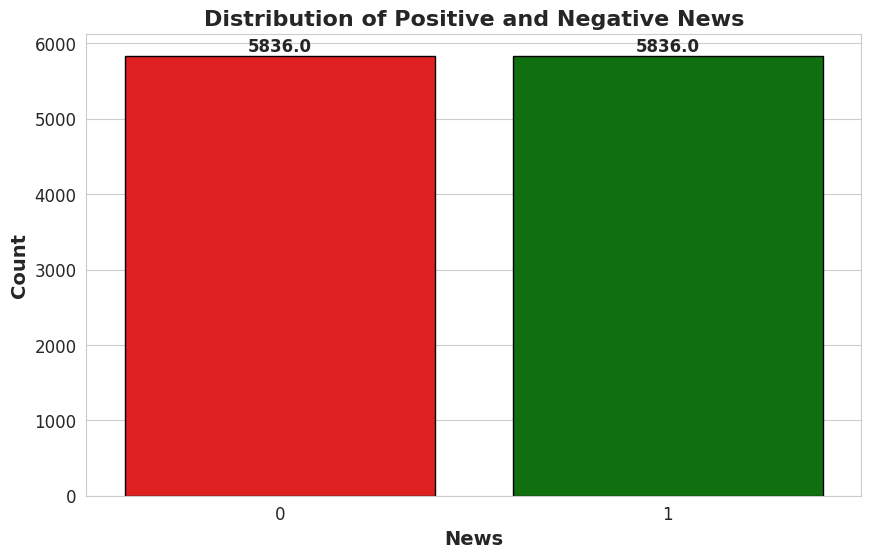

In [6]:
news_counts=dataset['label'].value_counts()
print(news_counts)

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
ax=sns.barplot(x=news_counts.index,y=news_counts.values, palette=["Red","Green"],edgecolor="black")
# Add labels above bars
for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight="bold")

# Customize labels & title
plt.xlabel("News", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")
plt.title("Distribution of Positive and Negative News", fontsize=16, fontweight="bold")

# Rotate x-ticks (if needed)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()



In [7]:
print(dataset.dtypes)
dataset['text']=dataset['text'].astype("string")
print(dataset.dtypes)

label     int64
text     object
dtype: object
label             int64
text     string[python]
dtype: object


# 🔹 **Removing Punctuation & Special Characters**

Bengali text can contain unnecessary punctuations, symbols, and special characters.

Example:

✅ Before: "'ঢাবির ‘খ’ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী (ঢাবি) - শিক্ষাবর্ষে কলা ভুক্ত ‘খ’ ইউনিট বর্ষ সম্মান"

✅ After: "ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢাবি শিক্ষাবর্ষে কলা ভুক্ত খ ইউনিট বর্ষ সম্মান"

🔹 Explanation of the Correct Regex (r"[^\u0980-\u09FFa-zA-Z0-9\s]")

1️⃣ \u0980-\u09FF → Matches all Bengali Unicode characters

2️⃣ a-zA-Z → Allows English letters (if present in mixed text)

3️⃣ 0-9 → Allows numbers

4️⃣ \s → Allows spaces

5️⃣ [^\u0980-\u09FFa-zA-Z0-9\s] → Removes everything except Bengali, English, numbers, and spaces

In [8]:
import re

def remove_punctuation(text):
    return re.sub(r"[^\u0980-\u09FFa-zA-Z0-9\s]", "", text)

# Fill any NA values in the 'text' column with empty strings before applying the function
dataset['text'] = dataset['text'].fillna('').apply(remove_punctuation)
print(dataset)

       label                                               text
0          0  ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...
1          0  দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...
2          1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...
3          1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...
4          1  খুলতে সংঘর্ষ নিহত  চট্টগ্রামে খুলতে সংঘর্ষ মো ...
...      ...                                                ...
11667      1  মসজিদ বাংলাদেশ নারী রত ভারত চাঁপা মসজিদ ইমিগ্র...
11668      0  এক নেতা ফেসবুক স্ট্যাটাস ঠান পানি গোসল কথা লেখ...
11669      0  কাঁদা আফ্রিকা  দৈনিক মতিকণ্ঠ পোঁদ শুভ হার মাহম...
11670      0  জিনা ইসলাম দুটা ছড়া হাঁস ছানা ফুটফুটে এক নাদুস...
11671      1  খাবার দূর ডার্ক সার্কাস পর্যাপ্ত ঘুম চা যত্ন চ...

[11672 rows x 2 columns]


In [9]:
print(dataset['text'][0])
print(dataset_numpy[0])

ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢাবি  শিক্ষাবর্ষে কলা ভুক্ত খ ইউনিট বর্ষ সম্মান শ্রেণি ভর্তি পরীক্ষা শুক্রবার সকাল টা হওয়া যুদ্ধ চলবে বেলা টা বিশ্বব্যাপী ক্যাম্প ক্যাম্প বাই কেন্দ্র ভর্তি পরীক্ষা অনুষ্ঠিত হ বছর আসন বিপরীত শিক্ষক আবেদন করেছেন ভর্তি পরীক্ষা উপলক্ষ্য পরীক্ষা কেন্দ্র সকাল ভিড় পরীক্ষা অভিভাব সকাল সাড়ে টা ভর্তিচ্ছু শিক্ষার্থী পরীক্ষা হওয়া প্রবেশ দেয়া দিক পরীক্ষা সুষ্ঠু সম্পন্ন পরীক্ষা হওয়া মোবাইল ফোন টেলিযোগাযোগ ইলেক্ট্রিক ডিভাইসযন্ত্ সম্পূর্ণ নিষিদ্ধ ছাড়া পরীক্ষা চলা মোবাইল কোর্ট দায়িত্ব পালন করছেন
[0
 'ঢাবির ‘খ’ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী (ঢাবি) - শিক্ষাবর্ষে কলা ভুক্ত ‘খ’ ইউনিট বর্ষ সম্মান শ্রেণি ভর্তি পরীক্ষা শুক্রবার সকাল টা হওয়া যুদ্ধ চলবে বেলা টা বিশ্বব্যাপী ক্যাম্প ক্যাম্প বাই কেন্দ্র ভর্তি পরীক্ষা অনুষ্ঠিত হ বছর আসন বিপরীত শিক্ষক আবেদন করেছেন। ভর্তি পরীক্ষা উপলক্ষ্য পরীক্ষা কেন্দ্র সকাল ভিড় পরীক্ষা অভিভাব সকাল সাড়ে টা ভর্তিচ্ছু শিক্ষার্থী পরীক্ষা হওয়া প্রবেশ দেয়া দিক পরীক্ষা সুষ্ঠু সম্পন্ন পরীক্ষা হওয়া মোবাইল ফোন টেলিযোগাযোগ ইলেক্ট্রিক ডিভাইস/

# **Load Bengali stopwords**

  filtered_words =
 [word for word in words if word not in bengali_stopwords]

*   It loops through each word in words
*   Checks if the word is not in bengali_stopwords
*  If the word is not a stopword, it is included in the new list filtered_words
*   Otherwise, it is removed from the list



words = ["আমি", "একটি", "ভালো", "পিজা", "খেয়েছি"]

bengali_stopwords = {"আমি", "একটি", "খেয়েছি"}

 filtered_words =["ভালো", "পিজা"]

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
bengali_stopwords = set(stopwords.words('bengali'))
print(bengali_stopwords)


{'দেন', 'বার', 'একটি', 'ভাবে', 'যাঁর', 'ছিলেন', 'গিয়ে', 'হয়েছেন', 'এবার', 'কোনো', 'আর', 'থাকেন', 'মতোই', 'আই', 'বক্তব্য', 'পরেই', 'হোক', 'কোন', 'এসে', 'হচ্ছে', 'থাকবে', 'দিকে', 'দিয়ে', 'দুই', 'যাদের', 'নাগাদ', 'যারা', 'হবে', 'পারে', 'হইয়া', 'আমরা', 'এমন', 'করেছে', 'নেই', 'গিয়ে', 'কাজ', 'নেওয়া', 'প্রভৃতি', 'যদিও', 'কমনে', 'স্পষ্ট', 'নিয়ে', 'স্বয়ং', 'করলেন', 'খুব', 'হিসাবে', 'সহ', 'এখানেই', 'করেন', 'সাধারণ', 'এমনি', 'থেকে', 'বলল', 'দেখা', 'কত', 'পক্ষে', 'কাছে', 'বেশ', 'ঠিক', 'সঙ্গে', 'তাও', 'সহিত', 'নয়', 'সে', 'হলে', 'করার', 'যাতে', 'হওয়ায়', 'ছাড়াও', 'করবেন', 'একবার', 'দেওয়ার', 'তারৈ', 'হন', 'আমি', 'ধরা', 'তার', 'গেছে', 'তিনিও', 'হয়', 'নিজেই', 'যিনি', 'করেই', 'থেকেও', 'ইহা', 'রাখা', 'কি', 'নেওয়ার', 'তোমার', 'অন্তত', 'দেওয়া', 'সেখানে', 'দিন', 'যাঁরা', 'উচিত', 'হয়নি', 'করছেন', 'কখনও', 'বলেন', 'জন্য', 'তাঁাহারা', 'গিয়েছে', 'চার', 'একই', 'জে', 'তারপর', 'দিতে', 'কয়েক', 'যাচ্ছে', 'এই', 'হতে', 'পর্যন্ত', 'তাহা', 'কেখা', 'কী', 'দিয়েছে', 'কবে', 'ওখানে', 'ভাবেই', 'এত', 'হওয়ার', 'কর

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:

print(dataset)
print(dataset.dtypes)

       label                                               text
0          0  ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...
1          0  দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...
2          1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...
3          1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...
4          1  খুলতে সংঘর্ষ নিহত  চট্টগ্রামে খুলতে সংঘর্ষ মো ...
...      ...                                                ...
11667      1  মসজিদ বাংলাদেশ নারী রত ভারত চাঁপা মসজিদ ইমিগ্র...
11668      0  এক নেতা ফেসবুক স্ট্যাটাস ঠান পানি গোসল কথা লেখ...
11669      0  কাঁদা আফ্রিকা  দৈনিক মতিকণ্ঠ পোঁদ শুভ হার মাহম...
11670      0  জিনা ইসলাম দুটা ছড়া হাঁস ছানা ফুটফুটে এক নাদুস...
11671      1  খাবার দূর ডার্ক সার্কাস পর্যাপ্ত ঘুম চা যত্ন চ...

[11672 rows x 2 columns]
label     int64
text     object
dtype: object


In [12]:
def remove_stopwords(text):
        words = text.split()
        filtered_words = [word for word in words if word not in bengali_stopwords]
        return " ".join(filtered_words)

dataset['text'] = dataset['text'].apply(remove_stopwords)
print(dataset.count)

<bound method DataFrame.count of        label                                               text
0          0  ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...
1          0  দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...
2          1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...
3          1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...
4          1  খুলতে সংঘর্ষ নিহত চট্টগ্রামে খুলতে সংঘর্ষ মো দ...
...      ...                                                ...
11667      1  মসজিদ বাংলাদেশ নারী রত ভারত চাঁপা মসজিদ ইমিগ্র...
11668      0  এক নেতা ফেসবুক স্ট্যাটাস ঠান পানি গোসল কথা লেখ...
11669      0  কাঁদা আফ্রিকা দৈনিক মতিকণ্ঠ পোঁদ শুভ হার মাহমু...
11670      0  জিনা ইসলাম দুটা ছড়া হাঁস ছানা ফুটফুটে এক নাদুস...
11671      1  খাবার দূর ডার্ক সার্কাস পর্যাপ্ত ঘুম চা যত্ন চ...

[11672 rows x 2 columns]>


# 🔹 **Removing Extra Spaces**

Multiple spaces should be replaced with a single space.

Example:

✅ Before: "আমি      ভালো        
আছি"

✅ After: "আমি ভালো আছি"

In [13]:
dataset["text"] = dataset["text"].str.replace(r"\s+", " ", regex=True).str.strip()
print(dataset)

       label                                               text
0          0  ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...
1          0  দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...
2          1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...
3          1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...
4          1  খুলতে সংঘর্ষ নিহত চট্টগ্রামে খুলতে সংঘর্ষ মো দ...
...      ...                                                ...
11667      1  মসজিদ বাংলাদেশ নারী রত ভারত চাঁপা মসজিদ ইমিগ্র...
11668      0  এক নেতা ফেসবুক স্ট্যাটাস ঠান পানি গোসল কথা লেখ...
11669      0  কাঁদা আফ্রিকা দৈনিক মতিকণ্ঠ পোঁদ শুভ হার মাহমু...
11670      0  জিনা ইসলাম দুটা ছড়া হাঁস ছানা ফুটফুটে এক নাদুস...
11671      1  খাবার দূর ডার্ক সার্কাস পর্যাপ্ত ঘুম চা যত্ন চ...

[11672 rows x 2 columns]


In [14]:
print(dataset['text'][0])
print(dataset_numpy[0])

ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢাবি শিক্ষাবর্ষে কলা ভুক্ত খ ইউনিট বর্ষ সম্মান শ্রেণি ভর্তি পরীক্ষা শুক্রবার সকাল টা হওয়া যুদ্ধ চলবে বেলা টা বিশ্বব্যাপী ক্যাম্প ক্যাম্প বাই কেন্দ্র ভর্তি পরীক্ষা অনুষ্ঠিত হ বছর আসন বিপরীত শিক্ষক আবেদন ভর্তি পরীক্ষা উপলক্ষ্য পরীক্ষা কেন্দ্র সকাল ভিড় পরীক্ষা অভিভাব সকাল সাড়ে টা ভর্তিচ্ছু শিক্ষার্থী পরীক্ষা হওয়া প্রবেশ দেয়া দিক পরীক্ষা সুষ্ঠু সম্পন্ন পরীক্ষা হওয়া মোবাইল ফোন টেলিযোগাযোগ ইলেক্ট্রিক ডিভাইসযন্ত্ সম্পূর্ণ নিষিদ্ধ ছাড়া পরীক্ষা চলা মোবাইল কোর্ট দায়িত্ব পালন
[0
 'ঢাবির ‘খ’ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী (ঢাবি) - শিক্ষাবর্ষে কলা ভুক্ত ‘খ’ ইউনিট বর্ষ সম্মান শ্রেণি ভর্তি পরীক্ষা শুক্রবার সকাল টা হওয়া যুদ্ধ চলবে বেলা টা বিশ্বব্যাপী ক্যাম্প ক্যাম্প বাই কেন্দ্র ভর্তি পরীক্ষা অনুষ্ঠিত হ বছর আসন বিপরীত শিক্ষক আবেদন করেছেন। ভর্তি পরীক্ষা উপলক্ষ্য পরীক্ষা কেন্দ্র সকাল ভিড় পরীক্ষা অভিভাব সকাল সাড়ে টা ভর্তিচ্ছু শিক্ষার্থী পরীক্ষা হওয়া প্রবেশ দেয়া দিক পরীক্ষা সুষ্ঠু সম্পন্ন পরীক্ষা হওয়া মোবাইল ফোন টেলিযোগাযোগ ইলেক্ট্রিক ডিভাইস/যন্ত্ সম্পূর্ণ

# ⚒ Stemming
What is stemming?

Stemming chops off word endings using simple rules.

It does not care about grammar or meaning.

খেলছি → খেল

খেলবে → খেল

খেলেছিল → খেল

খেলা → খেল

# 🧠 Lemmatization

Lemmatization reduces words to their dictionary form (lemma)
It understands grammar and meaning.

👉 NLTK does NOT support Bangla lemmatization
👉 Bangla has:

Rich morphology

Verb inflections

Postpositions

No high-quality universal lemmatizer like English WordNet



# 🎖️🎖️🎖️🎖️🎖️
**As you can see, stemming for bangla is only to be considered when using TF-IDF / One hot / Bag of words. Usually works faster and trains up the model training speed and covergence but If YOU ARE USING EMBEDDING BASED MODELS YOU DON'T HAVE TO STEM THE BANGLA WORDS ALL OF THE TIME AS VECTORIZATION OF WORDS OR EMBEDDINGS LEARN SIMILARITY INSTEAD OF EXACT WORD MATCHING**

খেলছি  → [0.21, -0.33, 0.98]

খেলবে  → [0.22, -0.30, 0.95]

খেলেছিল→ [0.20, -0.35, 0.97]

These words have similar vectors so in type of cases where you are using embedding based methods you don't have to actually stem the bengali words everytime

In [15]:
!pip install bnltk

  Using cached ml_dtypes-0.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached ml_dtypes-0.4.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.4
    Uninstalling ml_dtypes-0.5.4:
      Successfully uninstalled ml_dtypes-0.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.20.0 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.4.1 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.18.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.18.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.18.0 which is incompatible.
jaxlib 0.7.2 requires ml_dtypes>=

In [16]:
import bnltk
from bnltk.stemmer import BanglaStemmer

bn_stemmer = BanglaStemmer()

# Function to lemmatize Bengali text
def lemmatize_bangla(text):
        words = text.split()
        lemmatized_words = [bn_stemmer.stem(word) for word in words]
        return " ".join(lemmatized_words)

# Apply lemmatization
dataset["stemmed_text"] = dataset["text"].apply(lemmatize_bangla)

# Show first 10 rows after lemmatization
print(dataset[["text", "stemmed_text"]])

                                                    text  \
0      ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...   
1      দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...   
2      ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...   
3      সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...   
4      খুলতে সংঘর্ষ নিহত চট্টগ্রামে খুলতে সংঘর্ষ মো দ...   
...                                                  ...   
11667  মসজিদ বাংলাদেশ নারী রত ভারত চাঁপা মসজিদ ইমিগ্র...   
11668  এক নেতা ফেসবুক স্ট্যাটাস ঠান পানি গোসল কথা লেখ...   
11669  কাঁদা আফ্রিকা দৈনিক মতিকণ্ঠ পোঁদ শুভ হার মাহমু...   
11670  জিনা ইসলাম দুটা ছড়া হাঁস ছানা ফুটফুটে এক নাদুস...   
11671  খাবার দূর ডার্ক সার্কাস পর্যাপ্ত ঘুম চা যত্ন চ...   

                                            stemmed_text  
0      ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...  
1      দেশ এক হ উ কোরিয়া ঐতিহাসিক ভাষণ মুন বুধব পিয়ংই...  
2      ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...  
3      সরক হ উখিয় বঙ্গ মহিলা কলেজ দেশ সরক ক

# **Tokenization (Splitting into Words)**

1️⃣ words = text.split()

This splits the review into a list of individual words.
Example: "খাব দূর ডার্ক সার্কাস" → ["খাব", "দূর", "ডার্ক","সার্কাস"]

In [17]:
import nltk
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt_tab')

# Tokenize each review individually
dataset["tokenized_news"] = dataset["stemmed_text"].apply(lambda x: word_tokenize(str(x)))

# Display first 3 rows with tokens


print(dataset)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


       label                                               text  \
0          0  ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...   
1          0  দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...   
2          1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...   
3          1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...   
4          1  খুলতে সংঘর্ষ নিহত চট্টগ্রামে খুলতে সংঘর্ষ মো দ...   
...      ...                                                ...   
11667      1  মসজিদ বাংলাদেশ নারী রত ভারত চাঁপা মসজিদ ইমিগ্র...   
11668      0  এক নেতা ফেসবুক স্ট্যাটাস ঠান পানি গোসল কথা লেখ...   
11669      0  কাঁদা আফ্রিকা দৈনিক মতিকণ্ঠ পোঁদ শুভ হার মাহমু...   
11670      0  জিনা ইসলাম দুটা ছড়া হাঁস ছানা ফুটফুটে এক নাদুস...   
11671      1  খাবার দূর ডার্ক সার্কাস পর্যাপ্ত ঘুম চা যত্ন চ...   

                                            stemmed_text  \
0      ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...   
1      দেশ এক হ উ কোরিয়া ঐতিহাসিক ভাষণ মুন বুধব পিয়ংই...   
2      ভারত রত 

In [18]:
dataset.head()

,label,text,stemmed_text,tokenized_news
0,0,ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...,ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...,"[ঢাবির, খ, ইউনিট, ভর্তি, পরীক্ষা, ঢাকা, বিশ্বব..."
1,0,দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...,দেশ এক হ উ কোরিয়া ঐতিহাসিক ভাষণ মুন বুধব পিয়ংই...,"[দেশ, এক, হ, উ, কোরিয়া, ঐতিহাসিক, ভাষণ, মুন, ব..."
2,1,ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...,ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...,"[ভারত, রত, পাঠান, সাত, রোহিঙ্গা, ভাগ্য, বেগ, জ..."
3,1,সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...,সরক হ উখিয় বঙ্গ মহিলা কলেজ দেশ সরক কলেজ সমমান ...,"[সরক, হ, উখিয়, বঙ্গ, মহিলা, কলেজ, দেশ, সরক, কল..."
4,1,খুলতে সংঘর্ষ নিহত চট্টগ্রামে খুলতে সংঘর্ষ মো দ...,খুল সংঘর্ষ নিহত চট্টগ্রাম খুল সংঘর্ষ মো দ নাম ...,"[খুল, সংঘর্ষ, নিহত, চট্টগ্রাম, খুল, সংঘর্ষ, মো..."


# TF-IDF
Assigns Importance to words based on their frequency in a document versus their frequency in all documents. Here Document can be news/review and all of the documents signifies the dataset in my case.


>**TF= (Number of times term t appears in document,d) / (Total number of terms in document,d)**


>**IDF= log( (total number of documents) / (number of documents having term ,t )**

# **Use TF-IDF when:**

Text classification

Spam / scam detection

Logistic Regression / SVM / Naive Bayes

You want interpretability

# **When NOT to use BoW / TF-IDF**

❌ Language generation
❌ Context understanding
❌ Deep learning models
❌ Large-scale semantic tasks

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer


In [20]:
# Step 1: Create TF-IDF Vectorizer and Transform
tfidf_vectorizer= TfidfVectorizer()

# Join the tokens back into strings before applying fit_transform
X_tfidf=tfidf_vectorizer.fit_transform(dataset['tokenized_news'].apply(lambda x: ' '.join(x)))
unique_words=tfidf_vectorizer.get_feature_names_out()
print(X_tfidf.shape)


# Step 2: Get IDF Scores
idf_scores= tfidf_vectorizer.idf_
# Step 3: Create IDF Table
idf_df = pd.DataFrame({'Term': unique_words, 'IDF Score': idf_scores})
print("\nInverse Document Frequency (IDF) Table:\n")
print(idf_df)

# Step 4: Compute Average TF-IDF Scores and Add to IDF Table
tfidf_dense = X_tfidf.toarray()  # Get the dense TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_dense, columns=unique_words)
idf_df["Average TF-IDF Score"] = tfidf_df.mean(axis=0).values

print("\nTF-IDF Table (with Average TF-IDF Scores):\n")
print(idf_df)

(11672, 7240)

Inverse Document Frequency (IDF) Table:

          Term  IDF Score
0          অঅর   9.671887
1     অঅহমদইউন   8.978739
2        অআমলয   9.671887
3           অই   8.978739
4          অইত   8.755596
...        ...        ...
7235       ৰহণ   9.671887
7236        ৷গ   8.755596
7237        ৷প   9.266421
7238        ৷ব   8.755596
7239        ৷স   9.266421

[7240 rows x 2 columns]

TF-IDF Table (with Average TF-IDF Scores):

          Term  IDF Score  Average TF-IDF Score
0          অঅর   9.671887              0.000015
1     অঅহমদইউন   8.978739              0.000033
2        অআমলয   9.671887              0.000002
3           অই   8.978739              0.000040
4          অইত   8.755596              0.000053
...        ...        ...                   ...
7235       ৰহণ   9.671887              0.000006
7236        ৷গ   8.755596              0.000044
7237        ৷প   9.266421              0.000046
7238        ৷ব   8.755596              0.000136
7239        ৷স   9.266421         

In [21]:
dataset['tokenized_news'].to_csv("my_dataset.csv", index=False, encoding="utf-8") # to visualize

In [22]:
from sklearn.model_selection import train_test_split

# Convert TF-IDF features to numpy arrays
X = X_tfidf.toarray()  # Convert sparse TF-IDF matrix to a dense NumPy array
y = dataset['label'] # Convert labels to binary (1 for positive, 0 for negative)

# Split data into training (80%) and testing (20%) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Display dataset sizes
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

# Display class distributions
print("Training Class Distribution:\n", y_train.value_counts(normalize=True))
print("Test Class Distribution:\n", y_test.value_counts(normalize=True))

Training Set Size: (9337, 7240)
Test Set Size: (2335, 7240)
Training Class Distribution:
 label
1    0.500054
0    0.499946
Name: proportion, dtype: float64
Test Class Distribution:
 label
0    0.500214
1    0.499786
Name: proportion, dtype: float64


# Random Forest

In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score # Import necessary functions


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [24]:

import pickle

with open('randomforest.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
print("Model saved!")

# Load the model
with open('randomforest.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use loaded model for predictions
predictions = loaded_model.predict(X_test)

Model saved!


In [25]:


# Evaluate model
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test,predictions) # Changed variable name to avoid conflict with the function name
precision = precision_score(y_test,predictions) # Changed variable name to avoid conflict with the function name

print("Accuracy:", accuracy)
print("F1 Score:", f1) # Use the new variable name
print("Precision:", precision) # Use the new variable name

Accuracy: 0.7220556745182013
F1 Score: 0.7367139959432049
Precision: 0.699537750385208


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      1168
           1       0.70      0.78      0.74      1167

    accuracy                           0.72      2335
   macro avg       0.72      0.72      0.72      2335
weighted avg       0.72      0.72      0.72      2335


Confusion Matrix:
[[778 390]
 [259 908]]


# Approach of Embedding / Word vectorization
Word2vec will be used here which is a technique to compute vector representations for words. It uses neural network to capture the semantic meaning of words based on their context in the text. It can predict words based on their surrounding words . Allowing it to capture relationships and meanings between words.

# **Why embeddings are powerful**

Similar words → similar vectors

Meaning captured numerically

Compact (dense)

Can generalize to unseen combinations

# **Geometry intuition**

Words live in a vector space.

Distance → similarity

Direction → relationships

# **Types of Word Embeddings **

🔹Type 1: Static embeddings

Same word → same vector everywhere.

*   Word2Vec
*   GloVe
*   FastText

🔹 Type 2: Contextual embeddings

Same word → different vector depending on context.
*   BERT
*   RoBERTa
*   BanglaBERT
*   mBERT

# **Word2Vec**
Word2Vec learns embeddings by:

Predicting words from surrounding words

It learns meaning from context.
2 types of Word2Vec


*   **CBOW** -> Continuous bag of words : predict target word from context words
*   **Skip-gram** -> Predict context words from center word.



In [27]:
!pip install gensim NLTK

In [28]:
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import string

In [29]:
print(dataset.head())

   label                                               text  \
0      0  ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...   
1      0  দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...   
2      1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...   
3      1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...   
4      1  খুলতে সংঘর্ষ নিহত চট্টগ্রামে খুলতে সংঘর্ষ মো দ...   

                                        stemmed_text  \
0  ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...   
1  দেশ এক হ উ কোরিয়া ঐতিহাসিক ভাষণ মুন বুধব পিয়ংই...   
2  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...   
3  সরক হ উখিয় বঙ্গ মহিলা কলেজ দেশ সরক কলেজ সমমান ...   
4  খুল সংঘর্ষ নিহত চট্টগ্রাম খুল সংঘর্ষ মো দ নাম ...   

                                      tokenized_news  
0  [ঢাবির, খ, ইউনিট, ভর্তি, পরীক্ষা, ঢাকা, বিশ্বব...  
1  [দেশ, এক, হ, উ, কোরিয়া, ঐতিহাসিক, ভাষণ, মুন, ব...  
2  [ভারত, রত, পাঠান, সাত, রোহিঙ্গা, ভাগ্য, বেগ, জ...  
3  [সরক, হ, উখিয়, বঙ্গ, মহিলা, কলেজ, দেশ, সরক, কল...  
4  [খুল, 

# Prepare a new feature tokenized for embedding
**Note that here no tf-idf is needed , we are considering word vectors here**

In [30]:
import nltk
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('punkt_tab')

# Tokenize each review individually
dataset["tokenized_news_forembedding"] = dataset["text"].apply(lambda x: word_tokenize(str(x)))

# Display first 3 rows with tokens


print(dataset)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


       label                                               text  \
0          0  ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...   
1          0  দেশ এক হওয়া উ কোরিয়ায় ঐতিহাসিক ভাষণ মুন বুধবার...   
2          1  ভারত রত পাঠান সাত রোহিঙ্গা ভাগ্য বেগ জাতিসংঘ আ...   
3          1  সরকার হওয়া উখিয়ার বঙ্গ মহিলা কলেজ দেশ সরকার কল...   
4          1  খুলতে সংঘর্ষ নিহত চট্টগ্রামে খুলতে সংঘর্ষ মো দ...   
...      ...                                                ...   
11667      1  মসজিদ বাংলাদেশ নারী রত ভারত চাঁপা মসজিদ ইমিগ্র...   
11668      0  এক নেতা ফেসবুক স্ট্যাটাস ঠান পানি গোসল কথা লেখ...   
11669      0  কাঁদা আফ্রিকা দৈনিক মতিকণ্ঠ পোঁদ শুভ হার মাহমু...   
11670      0  জিনা ইসলাম দুটা ছড়া হাঁস ছানা ফুটফুটে এক নাদুস...   
11671      1  খাবার দূর ডার্ক সার্কাস পর্যাপ্ত ঘুম চা যত্ন চ...   

                                            stemmed_text  \
0      ঢাবির খ ইউনিট ভর্তি পরীক্ষা ঢাকা বিশ্বব্যাপী ঢ...   
1      দেশ এক হ উ কোরিয়া ঐতিহাসিক ভাষণ মুন বুধব পিয়ংই...   
2      ভারত রত 

In [31]:
from gensim.models import Word2Vec

# Ensure 'Tokenized_Reviews' contains lists of words
# dataset["tokenized_news_forembedding"] = dataset["tokenized_news_forembedding"].apply(lambda x: x.split() if isinstance(x, str) else x)

# Train Word2Vec properly
w2v_model = Word2Vec(
    sentences=dataset["tokenized_news_forembedding"],
    vector_size=100,  # Increased embedding size
    window=7,         # Capture more context
    sg=1,             # Skip-gram model for better performance
    min_count=2,      # Ignore rare words
    workers=4
)

# Function to convert reviews into average word vectors
import numpy as np

def get_news_vector(review, model):
    vectors = [model.wv[word] for word in review if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Apply fixed embedding method
dataset["vectorized_news"] = dataset["tokenized_news_forembedding"].apply(lambda x: get_news_vector(x, w2v_model))

In [32]:
print(w2v_model.wv.most_similar('সন্ত্রাস'))
test_vextor= w2v_model.wv['সন্ত্রাস']
print(test_vextor)
print(w2v_model.wv.most_similar('নিহত'))

[('জঙ্গম', 0.800641655921936), ('জঙ্গিবাদ', 0.7923237681388855), ('হামলাগুলো', 0.7724959850311279), ('মদদ', 0.7558559775352478), ('অপতৎপরতা', 0.7520233988761902), ('জঙ্গী', 0.743861198425293), ('জঙ্গিগোষ্ঠী', 0.7418655753135681), ('জঙ্গিবা', 0.7349849343299866), ('আইএস', 0.7292658090591431), ('মোকাবেলায়', 0.7229453325271606)]
[ 3.50224897e-02  3.87337685e-01  4.51788455e-02 -3.38336557e-01
  4.18282241e-01  3.07465880e-03 -4.50445414e-01  1.81750000e-01
 -1.81525856e-01  2.56216098e-02 -2.69965321e-01 -4.24608886e-01
 -3.49347919e-01  1.50880069e-01  4.51484881e-02  2.21762136e-02
 -5.57744920e-01  5.81000268e-01  1.60406411e-01 -2.87079096e-01
  6.40624985e-02  4.15933639e-01 -9.58795324e-02 -4.35584933e-01
  1.56230601e-02 -3.08378160e-01 -2.64271766e-01  7.64162454e-04
  2.51933746e-02  4.61300671e-01 -1.39345795e-01  3.64842683e-01
  9.64492336e-02 -3.42249930e-01 -4.19360340e-01  2.36469761e-01
  1.02771990e-01 -3.84705693e-01 -4.48501557e-01 -9.97108638e-01
 -2.09481239e-01 -1.0

In [33]:
vocab_size = len(w2v_model.wv)
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 36024


**Check if the vector sizes for each word is consistent**

In [34]:
dataset['vector_sizes']= dataset['vectorized_news'].apply(lambda x: x.shape)
print(dataset[['vector_sizes','vectorized_news']])

      vector_sizes                                    vectorized_news
0           (100,)  [-0.45005637, 0.19570363, 0.14850095, 0.107229...
1           (100,)  [-0.23198248, 0.21033502, -0.004362074, -0.145...
2           (100,)  [-0.2780856, 0.1794456, 0.11074605, -0.1916898...
3           (100,)  [-0.32555628, 0.173953, 0.054283418, 0.0696488...
4           (100,)  [-0.41694808, 0.15577115, 0.06331342, -0.03997...
...            ...                                                ...
11667       (100,)  [-0.30361292, 0.14031266, 0.027942354, -0.0722...
11668       (100,)  [-0.14183919, 0.2992985, 0.19926038, 0.0679534...
11669       (100,)  [-0.25899523, 0.23823778, 0.06639594, 0.093265...
11670       (100,)  [-0.3251154, 0.24545898, 0.056603376, -0.00660...
11671       (100,)  [-0.2806742, 0.2919701, 0.03962382, 0.1622259,...

[11672 rows x 2 columns]


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
from sklearn.model_selection import train_test_split


In [36]:
X = np.vstack(dataset['vectorized_news'].values)
y = np.array(dataset['label'])


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [38]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)


In [39]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [40]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [41]:
class NewsDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [42]:
train_dataset = NewsDataset(X_train, y_train)
test_dataset = NewsDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [43]:
class CNNModel(nn.Module):
    def __init__(self, input_length):
        super().__init__()

        self.conv1 = nn.Conv1d(1, 128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(128)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(128, 256, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(256)
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(256, 256, kernel_size=7, padding=3)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.MaxPool1d(2)

        # Compute flattened size dynamically
        dummy = torch.zeros(1, 1, input_length)
        dummy = self._forward_features(dummy)
        flattened_size = dummy.view(1, -1).size(1)

        self.fc1 = nn.Linear(flattened_size, 256)
        self.drop1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(256, 128)
        self.drop2 = nn.Dropout(0.3)

        self.out = nn.Linear(128, 1)

    def _forward_features(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        return x

    def forward(self, x):
        x = self._forward_features(x)
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.drop1(x)
        x = torch.relu(self.fc2(x))
        x = self.drop2(x)
        x = torch.sigmoid(self.out(x))
        return x


In [48]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CNNModel(input_length=X_train.shape[2]).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)


In [49]:
epochs = 25

for epoch in range(epochs):
    model.train()
    train_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device).unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            outputs = model(X_batch)
            preds = (outputs.squeeze() >= 0.5).int()
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)

    acc = correct / total
    print(f"Epoch [{epoch+1}/{epochs}] | Loss: {train_loss:.4f} | Val Acc: {acc:.4f}")


Epoch [1/25] | Loss: 90.5045 | Val Acc: 0.6887
Epoch [2/25] | Loss: 84.6193 | Val Acc: 0.6882
Epoch [3/25] | Loss: 83.6643 | Val Acc: 0.6955
Epoch [4/25] | Loss: 82.2686 | Val Acc: 0.6981
Epoch [5/25] | Loss: 81.0437 | Val Acc: 0.6994
Epoch [6/25] | Loss: 79.7079 | Val Acc: 0.7006
Epoch [7/25] | Loss: 77.6541 | Val Acc: 0.7036
Epoch [8/25] | Loss: 76.6046 | Val Acc: 0.7024
Epoch [9/25] | Loss: 76.1117 | Val Acc: 0.7109
Epoch [10/25] | Loss: 73.2483 | Val Acc: 0.7058
Epoch [11/25] | Loss: 72.7769 | Val Acc: 0.7088
Epoch [12/25] | Loss: 71.0144 | Val Acc: 0.6732
Epoch [13/25] | Loss: 69.9056 | Val Acc: 0.7113
Epoch [14/25] | Loss: 68.4118 | Val Acc: 0.7122
Epoch [15/25] | Loss: 66.5818 | Val Acc: 0.7259
Epoch [16/25] | Loss: 64.4385 | Val Acc: 0.7079
Epoch [17/25] | Loss: 62.5400 | Val Acc: 0.7285
Epoch [18/25] | Loss: 61.1022 | Val Acc: 0.7238
Epoch [19/25] | Loss: 60.2084 | Val Acc: 0.7392
Epoch [20/25] | Loss: 57.4125 | Val Acc: 0.7139
Epoch [21/25] | Loss: 56.4269 | Val Acc: 0.7302
E

# Saving the Model using OnnX

In [57]:
pip install skl2onnx onnxruntime onnxscript

In [55]:
import onnx





In [60]:
model.eval()

dummy_input = torch.randn(1, 1, X_train.shape[2]).to(device)

onnx_path = "cnn_text_classifier.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    export_params=True,
    opset_version=11,
    do_constant_folding=True,
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={
        "input": {0: "batch_size"},
        "output": {0: "batch_size"}
    },
    dynamo=False
)

print("✅ Model exported to ONNX successfully!")


/tmp/ipython-input-2666186193.py:7: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=True in torch.onnx.export. This new exporter supports features like exporting LLMs with DynamicCache. We encourage you to try it and share feedback to help improve the experience. Learn more about the new export logic: https://pytorch.org/docs/stable/onnx_dynamo.html. For exporting control flow: https://pytorch.org/tutorials/beginner/onnx/export_control_flow_model_to_onnx_tutorial.html.
  torch.onnx.export(


✅ Model exported to ONNX successfully!
